# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [2]:
# write the code for reading the dataset abtest.csv

df = pd.read_csv('abtest.csv') 
# This will shows the first five rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


* The dataset contains 100 rows and 6 columns
* The six columns in the data are 'user_id', 'group', 'landing_page', 'time_spend_on_the_page', 'converted', 'language_preferred'
* 4 of the columns are of object type (string) and 1 column integer type (numeric) and 1 in float type (numeric)
* There are no missing values in the data

In [4]:
df = df.astype({"group"              : 'category',
                "landing_page"       : 'category',
                "converted"          : 'category',
                "language_preferred" : 'category'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


* By changing the column data type from object to category, the memory usage in decreased around 40%

In [6]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


### Observation based on sample
* The average output for the time_spent_on_the_page (both old and new together) is 5.3778 min for both page landing
* The std for the time_spent_on_the_page ((both old and new together)) is 2.378 min for both page landing

In [7]:
print (df['group'].value_counts())
print (df['landing_page'].value_counts())

control      50
treatment    50
Name: group, dtype: int64
new    50
old    50
Name: landing_page, dtype: int64


### Observation based on sample
* Number of old landing page (control group) is 50
* Number of new landing page (treatment group) is 50

In [8]:
df.groupby(by=['landing_page'])['time_spent_on_the_page'].describe().T

landing_page,new,old
count,50.000000,50.000000
mean,6.223200,4.532400
std,1.817031,2.581975
min,1.650000,0.190000
25%,5.175000,2.720000
50%,6.105000,4.380000
75%,7.160000,6.442500
max,10.710000,10.300000


In [9]:
# find the sample means and sample standard deviations for the two samples
print('The mean of spending time on new landing page is ' , df.groupby(by=['landing_page'])['time_spent_on_the_page'].mean()[0])
print('The std of spending time on new landing page is ' , df.groupby(by=['landing_page'])['time_spent_on_the_page'].std()[0])
print('The mean of spending time on old landing page is ' , df.groupby(by=['landing_page'])['time_spent_on_the_page'].mean()[1])
print('The std of spending time on old landing page is ' , df.groupby(by=['landing_page'])['time_spent_on_the_page'].std()[1])

The mean of spending time on new landing page is  6.2232
The std of spending time on new landing page is  1.8170310387878268
The mean of spending time on old landing page is  4.532400000000001
The std of spending time on old landing page is  2.581974849306046


### Observation based on sample

* The average time_spent_on_the_page of the groups are different.
* The standard deviation on time_spent_on_the_page of the groups are different

### Univariate Analysis

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

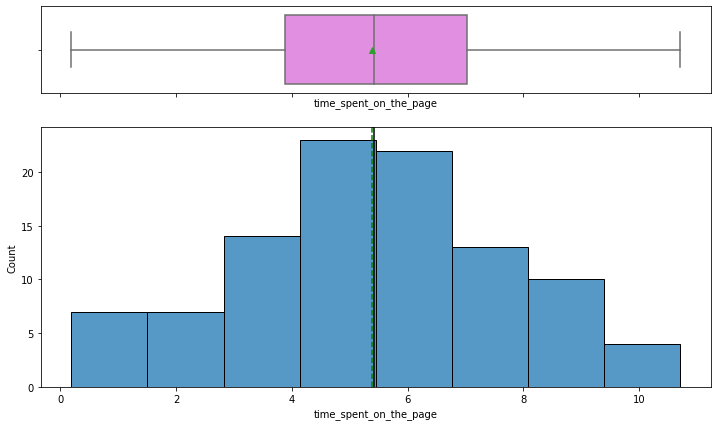

In [12]:
histogram_boxplot(df, 'time_spent_on_the_page') #boxplot and histogram plot of the time_spent_on_the_page data

### Observation based on sample

* Average time spend on the page (old and new together) is 5.3778 as mentioned before and it is shown above.
* The mean and median are mostlty the same (median is 5.41 based on data described above) and it is shown above.
* The data seems normally distributed around mean (or median as they are mostly equal).

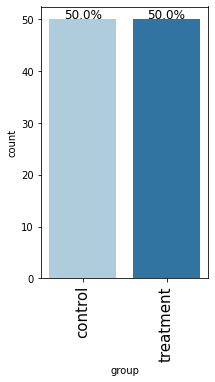

In [13]:
labeled_barplot(df, 'group') # barplots of group data

### Observation based on sample
* Number of control group is 50
* Number treatment group is 50

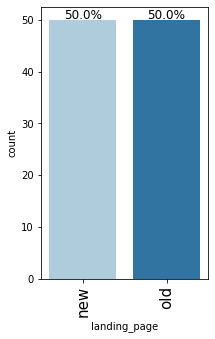

In [14]:
labeled_barplot(df, 'landing_page') # barplots of landing_page data

### Observation based on sample
* Number of old landing page is 50
* Number of new landing page is 50

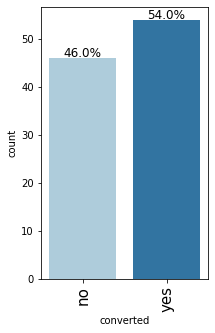

In [15]:
labeled_barplot(df, 'converted') # barplots of converted data

### Observation based on sample
* Total number of converted is 54% regardless of old or new page

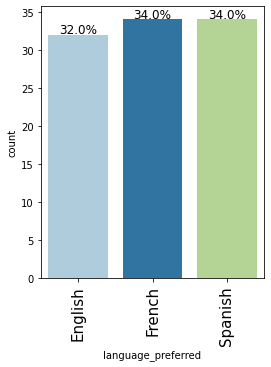

In [16]:
labeled_barplot(df, 'language_preferred') # barplots of language_preferred data

### Observation based on sample
* The variation of language prefered by the user are shown above regardless of old or new page landing

### Bivariate Analysis

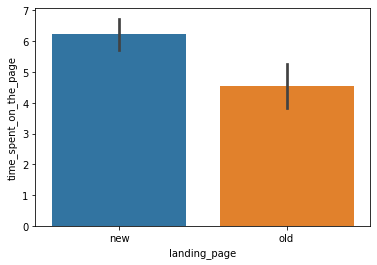

In [17]:
sns.barplot(x=df['landing_page'], y=df['time_spent_on_the_page'])
plt.show()

### Observation based on sample
* The average time spend on new landing page is more than the old landing page

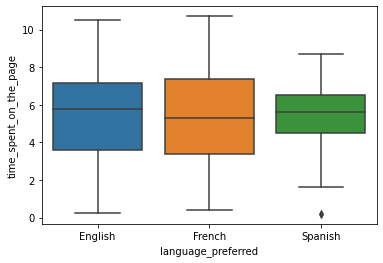

In [18]:
sns.boxplot(x=df['language_preferred'], y=df['time_spent_on_the_page'])
plt.show()

### Observation based on sample
* The average time spend on landing page (both old ans new) are mostly the same.
* In Spanish language, it seems there is a outlier in the data (A very small amout is detected in the data). 

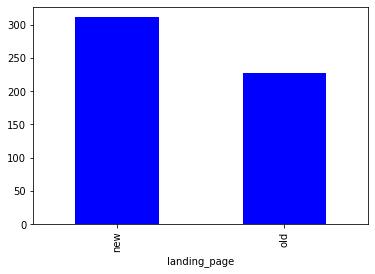

In [19]:
df.groupby(by=['landing_page'])['time_spent_on_the_page'].sum().plot(x='landing_page',y='time_spent_on_the_page',kind='bar', color='b')
plt.show()

### Observation based on sample
* Regarding the two above barplots, the time spent on new landing page is higher than old page in average and cumutativley.

In [20]:
# converted the 'convert' column to the numeric to be used or further calculation
df['subscribed']=0
df.loc[df['converted']== 'yes', 'subscribed']= 1
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred,subscribed
0,546592,control,old,3.48,no,Spanish,0
1,546468,treatment,new,7.13,yes,English,1
2,546462,treatment,new,4.40,no,Spanish,0
3,546567,control,old,3.02,no,French,0
4,546459,treatment,new,4.75,yes,Spanish,1


* CONVERTED column, is changed to the numeric to be used in calculation.
* 'no' is considred "0" and 'yes' supposed as "1".
* The data is stored in subscribed column as shown in above dataframe.

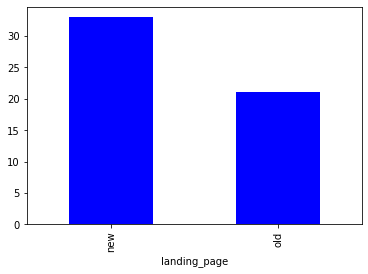

landing_page
new    33
old    21
Name: subscribed, dtype: int64


In [21]:
df.groupby(by=['landing_page'])['subscribed'].sum().plot(x='landing_page',y='subscribed',kind='bar', color='b')
plt.show()

no_subscribed=df.groupby(by=['landing_page'])['subscribed'].sum()
print (no_subscribed)

### Observation based on sample
* The number of subscribed group based on landing page type (old or new) is changed.
* The number of subsribed group on new landing page is 33 respect to the old one which is 21.


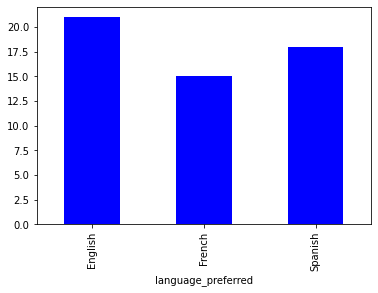

language_preferred
English    21
French     15
Spanish    18
Name: subscribed, dtype: int64

In [22]:
df.groupby(by=['language_preferred'])['subscribed'].sum().plot(x='language_preferred',y='subscribed',kind='bar', color='b')
plt.show()
df.groupby(by=['language_preferred'])['subscribed'].sum()

### Observation based on sample
* The number of subscribed group based on prefered language:
* English =21
* French  =15
* Spanish =18


## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

### Perform Visual Analysis

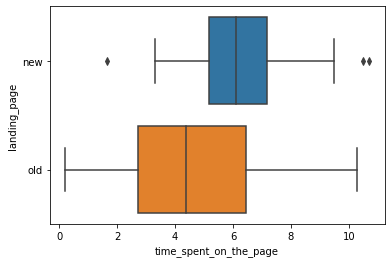

In [23]:
sns.boxplot(data = df, x = 'time_spent_on_the_page', y = 'landing_page')
plt.show()

### Step 1: Define the null and alternate hypotheses

$H_0:$ The mean time output from the new landing page is equal or less to the mean time output from the old landing page.

$H_a:$ The mean time output from the new landing page is greater than the mean time output from the old landing page.

Let $\mu_2$ and $\mu_1$ be the mean time output from the new landing page and the mean time output from the old landing page respectively.

Mathematically, the above formulated hypotheses can be written as:

$H_0: \mu_2 <= \mu_1 $

$H_a: \mu_2 > \mu_1 $

### Step 2: Select Appropriate test

Let's test whether the T-test assumptions are satisfied or not:
    
    * Continuous data - Yes, the 'time spending' is measured on a continuous scale.
    * Normally distributed populations - Yes, as the sample has normal shape.
    * Independent populations - As we are taking random samples for two different groups, the two samples are from two 
      independent populations.
    * Unequal population standard deviations - As the sample standard deviations are different, the population standard 
      deviations may be assumed to be different.
    * Random sampling from the population - Yes, the collected sample is random sample.

This is a case of a one-tailed two-sample mean test. We suppose that the observations are randomly drawn from the population. As the two samples are independent in this case (the measurements for both landing pages are not related to the same user_id, and also the population standard deviations are unknown, we shall use a two sample t-test, comparing means with unknown population variance for this problem.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha$ = 0.05

### Step 4: Collect and prepare data

In [24]:
df.loc[df['landing_page']=='old','time_old']=df['time_spent_on_the_page']
df.loc[df['landing_page']=='new','time_new']=df['time_spent_on_the_page']

* Add two columns to the data, time_new and time_old, which shows the time spend on new and old pages respectively.

### Step 5: Calculate the p-value

In [25]:
# find the p-value
test_stat_time_new_old, p_value_time_new_old = stats.ttest_ind(df['time_new'].dropna(), df['time_old'].dropna(), equal_var = False, alternative = 'greater')
print('The p-value is ', p_value_time_new_old)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [26]:
# print the conclusion based on p-value
if p_value_time_new_old < 0.05:
    print(f'As the p-value {p_value_time_new_old} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value_time_new_old} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

At 5% significance level, we reject the null hypothesis. Hence we have enough statistical evidence to reject that the mean time output from the new landing page is equal or less to the mean time output from the old landing page.

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

### Perform Visual Analysis

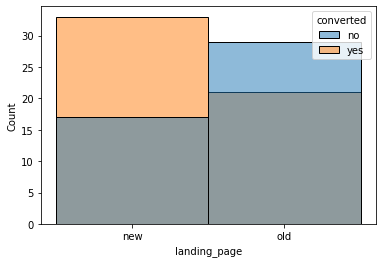

In [27]:
sns.histplot(data = df, x = 'landing_page', hue = 'converted')
plt.show()

### Step 1: Define the null and alternate hypotheses

$H_0:$ The conversion rate from the new landing page is equal or less to the conversion rate from the old landing page.

$H_a:$ The conversion rate from the new landing page is greater than the conversion rate from the old landing page.

Let $p_2$ and $p_1$ be the conversion rate from the new landing page and the conversion rate from the old landing page respectively.

Mathematically, the above formulated hypotheses can be written as:

$H_0: p_2 <= p_1 $

$H_a: p_2 > p_1 $




### Step 2: Select Appropriate test

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a product is either converted or non-converted.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.

* Based on analysis in part1 = for new landing page bumber of converted are 33 out of 50
* Based on analysis in part1 = for old landing page bumber of converted are 21 out of 50


>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $


* Based on above analysis Two Proportion Z-test will be applied


### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha$ = 0.05

### Step 4: Collect and prepare data

In [28]:
no_subscribed=df.groupby(by=['landing_page'])['subscribed'].sum()
print (no_subscribed)

# set the counts of defective items
subscribed_count = np.array([33, 21])

# set the sample sizes
nobs = np.array([50, 50])

landing_page
new    33
old    21
Name: subscribed, dtype: int64


* Converted from new page is 33 out of 50 and converted from old page is 21 out of 50.

### Step 5: Calculate the p-value

In [29]:
from statsmodels.stats.proportion import proportions_ztest

# find the p-value
test_stat_proportion, p_value_proportion = proportions_ztest(subscribed_count, nobs)
print('The p-value is ' + str(p_value_proportion))

The p-value is 0.016052616408112556


### Step 6: Compare the p-value with $\alpha$

In [30]:
# print the conclusion based on p-value
if p_value_proportion < 0.05:
    print(f'As the p-value {p_value_proportion} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value_proportion} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.016052616408112556 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

At 5% significance level, we reject the null hypothesis. Hence we have enough statistical evidence to reject that the conversion rate from the new landing page is equal or less to the conversion rate from the old landing page.

## 4. Is the conversion and preferred language are independent or related? (10 Marks)

### Perform Visual Analysis

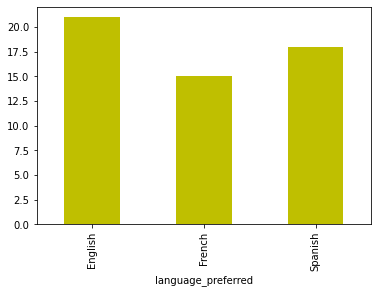

In [31]:
df.groupby(by=['language_preferred'])['subscribed'].sum().plot(x='language_preferred',y='subscribed',kind='bar', color='y')
plt.show()

### Step 1: Define the null and alternate hypotheses

>$H_0:$ conversion is independent of preferred language.

against the alternate hypothesis

>$H_a:$ conversion depends on preferred language.

### Step 2: Select Appropriate test

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5
* Random sampling from the population - Yes, the collected sample is a simple random sample.

* Chi-Square Test for Independence will be applied

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha$ = 0.05

### Step 4: Collect and prepare data

In [32]:
df.groupby(by=['landing_page','language_preferred'])['converted'].value_counts()

landing_page  language_preferred  converted
new           English             yes          10
                                  no            6
              French              yes          12
                                  no            5
              Spanish             yes          11
                                  no            6
old           English             yes          11
                                  no            5
              French              no           14
                                  yes           3
              Spanish             no           10
                                  yes           7
Name: converted, dtype: int64

* The above information show the number of converted in each landing page based on their language prefered.

In [33]:
# For old and new data, converted numbers is gathered in the following table based on above data
raw_data = {'Data': ['old','new'], 'English': [11,10],'French': [3,12], 'Spanish': [7,11]}
df_2 = pd.DataFrame(raw_data, columns = ['Data','English','French','Spanish'])
df_2

,Data,English,French,Spanish
0,old,11,3,7
1,new,10,12,11


* The above information is gathered in new dataframe. 

### Step 5: Calculate the p-value

In [34]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value_independece, dof, expected=chi2_contingency(df_2.drop('Data', axis = 1))
print('The p-value is', p_value_independece)


The p-value is 0.1451131947907269


### Step 6: Compare the p-value with $\alpha$

In [35]:
# print the conclusion based on p-value
if p_value_independece < 0.05:
    print(f'As the p-value {p_value_independece} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value_independece} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.1451131947907269 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

As the p-value is more than the significance level, we can not reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that conversion is independent of preferred language at 5% significance level.

## 5. Is the time spent on the new page same for the different language users? (10 Marks)

### Perform Visual Analysis

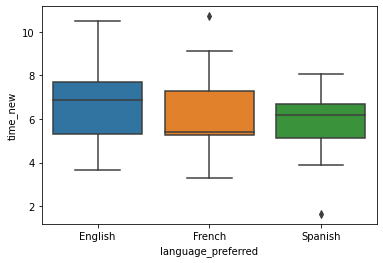

In [36]:
sns.boxplot(x=df['language_preferred'], y=df['time_new'])
plt.show()

* It seems that there is a outlier in Spanish and French languages spent time on new page

### Step 1: Define null and alternate hypotheses

$H_0$ : The mean spent time on new landing page with respect to each language prefered category is equal.

$H_a$ : At least one of the mean spent time on new landing page with respect to each language prefered category is different.

### Step 2: Select Appropriate test

This is a problem, concerning three population means. One-way ANOVA could be the appropriate test here provided normality and equality of variance assumptions are verified.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

* Samples are independent simple random samples (we supose this is the case)

#### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ The spent time follow a normal distribution

against the alternative hypothesis

>$H_a:$ The spent time do not follow a normal distribution

In [37]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test

# find the p-value
w, p_value_shapiro = stats.shapiro(df['time_new'].dropna()) 
print('The p-value is', p_value_shapiro)

The p-value is 0.8040016293525696


Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

#### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [38]:
#Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats library for this test

# find the p-value
statistic, p_value_levene = stats.levene(df[df['language_preferred']=='English']['time_new'].dropna(),
                                         df[df['language_preferred']=='French']['time_new'].dropna(),
                                         df[df['language_preferred']=='Spanish']['time_new'].dropna())
print('The p-value is', p_value_levene)

The p-value is 0.46711357711340173


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [39]:
df.groupby(by=['landing_page','language_preferred'])['time_spent_on_the_page'].mean()

landing_page  language_preferred
new           English               6.663750
              French                6.196471
              Spanish               5.835294
old           English               4.454375
              French                4.310000
              Spanish               4.828235
Name: time_spent_on_the_page, dtype: float64

### Step 5: Calculate the p-value

In [40]:
# separate the time on new page with respect to the three different languages

Time_English=df[df['language_preferred']=='English']['time_new'].dropna()
Time_French =df[df['language_preferred']=='French']['time_new'].dropna()
Time_Spanish=df[df['language_preferred']=='Spanish']['time_new'].dropna()

In [41]:
# perform one-way anova test using the f_oneway function from scipy.stats library
test_stat, p_value_same_time = stats.f_oneway(Time_English, Time_French, Time_Spanish)
print('The p-value is ', p_value_same_time)

The p-value is  0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [42]:
# print the conclusion based on p-value
if p_value_same_time < 0.05:
    print(f'As the p-value {p_value_same_time} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value_same_time} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is more than the 5% significance level, we can not reject the null hypothesis. Hence, we do not have enough statistical evidence to reject that the mean spent time on new landing page with respect to each language prefered category is equal.

### Multiple Comparison test (Tuckey HSD)

In order to identify for which group mean is different from other groups, the null hypothesis is

  > $𝐻_0: 𝜇_A=𝜇_B \text{ and } 𝜇_A=𝜇_C \text{ and } 𝜇_B=𝜇_C$

against the alternative hypothesis

 > $𝐻_a: 𝜇_A\neq𝜇_B \text{ or } 𝜇_A\neq𝜇_C \text{ or } 𝜇_B\neq𝜇_C$

In [43]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = df['time_new'].dropna(), groups = df[df['landing_page']=='new']['language_preferred'], alpha = 0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.4673 0.7259 -2.0035  1.069  False
English Spanish  -0.8285  0.401 -2.3647 0.7078  False
 French Spanish  -0.3612  0.816  -1.874 1.1516  False
-----------------------------------------------------


* The above test also shows that we can not reject non of the equality.

## Conclusion and Business Recommendations

### Conclusion

* At 5% significance level, we have enough statistical evidence to reject that the mean time spending in the new landing page is equal or less than the mean time spending in the old landing page. It means, the spending time in new page is increased.

* At 5% significance level, we have enough statistical evidence to reject that the conversion rate from the new landing page is equal or less than the conversion rate from the old landing page. It means, the subscription on new page in increased.

* We do not have enough statistical significance to reject that conversion is independent of preferred language at 5% significance level. It means that, the conversion is independent of prefered languages.

* We do not have enough statistical evidence to reject that the mean spent time on new landing page with respect to each language prefered category is equal.It means that, spending time is equal for different languages.

### Recommendation

* It seems that the new page resulted in increasing the number of subscriptions successfully, but still there are people that do not subscribe on the page. It is recommended to plan a survey from the site visitors and ask them about the factors which may increase the chance of subscriptions by them.

* Since the subscription rate is independent of prefereed languages, development of the other languages is not necassary at this time. 

* Investigate the factors that resulted in increasing the time spend on the new page and work more to develop these factors. 